In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import cv2
import os
import ast

# 1 - Load the data

In [2]:
# Path
INPUT_PATH = '/kaggle/input/tensorflow-great-barrier-reef'
IMAGES_PATH = os.path.join(INPUT_PATH, "train_images")
print("Images path: ", IMAGES_PATH)
df_train = pd.read_csv(os.path.join(INPUT_PATH,'train.csv'))
df_test = pd.read_csv(os.path.join(INPUT_PATH,'test.csv'))

Images path:  /kaggle/input/tensorflow-great-barrier-reef/train_images


In [3]:
os.path.join(IMAGES_PATH, "video_") 

'/kaggle/input/tensorflow-great-barrier-reef/train_images/video_'

In [4]:
df_train["image_path"] = IMAGES_PATH + "/video_" \
                        + df_train["video_id"].astype(str) \
                        + "/" + df_train["video_frame"].astype(str) + ".jpg"

In [5]:
# annotations are saved as an array formatted as a string (like "[]"), 
# I use the ast library to extract the array from the string (to get [] instead of "[]")
df_train["annotations"] = df_train["annotations"].apply(lambda x: ast.literal_eval(x))
# having the annotations in array format, I can now check the length of the array 
# getting how many bounding boxes are in the image
df_train["num_bboxes"] = df_train["annotations"].apply(lambda x: len(x))

In [6]:
df_train

,video_id,sequence,video_frame,sequence_frame,image_id,annotations,image_path,num_bboxes
0,0,40258,0,0,0-0,[],/kaggle/input/tensorflow-great-barrier-reef/tr...,0
1,0,40258,1,1,0-1,[],/kaggle/input/tensorflow-great-barrier-reef/tr...,0
2,0,40258,2,2,0-2,[],/kaggle/input/tensorflow-great-barrier-reef/tr...,0
3,0,40258,3,3,0-3,[],/kaggle/input/tensorflow-great-barrier-reef/tr...,0
4,0,40258,4,4,0-4,[],/kaggle/input/tensorflow-great-barrier-reef/tr...,0
...,...,...,...,...,...,...,...,...
23496,2,29859,10755,2983,2-10755,[],/kaggle/input/tensorflow-great-barrier-reef/tr...,0
23497,2,29859,10756,2984,2-10756,[],/kaggle/input/tensorflow-great-barrier-reef/tr...,0
23498,2,29859,10757,2985,2-10757,[],/kaggle/input/tensorflow-great-barrier-reef/tr...,0
23499,2,29859,10758,2986,2-10758,[],/kaggle/input/tensorflow-great-barrier-reef/tr...,0


### Load image into numpy array and show using matplotlib

Image shape:  (720, 1280, 3)


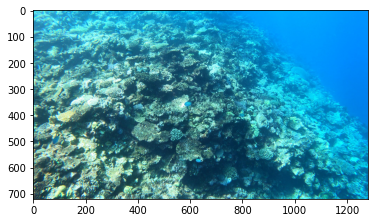

In [7]:
image = cv2.imread(df_train["image_path"][0])
#convert to RGB, cv2 cretaes BGR image by default
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
print("Image shape: ", image.shape)
plt.imshow(image)
plt.show()

### Load image using PIL.Image

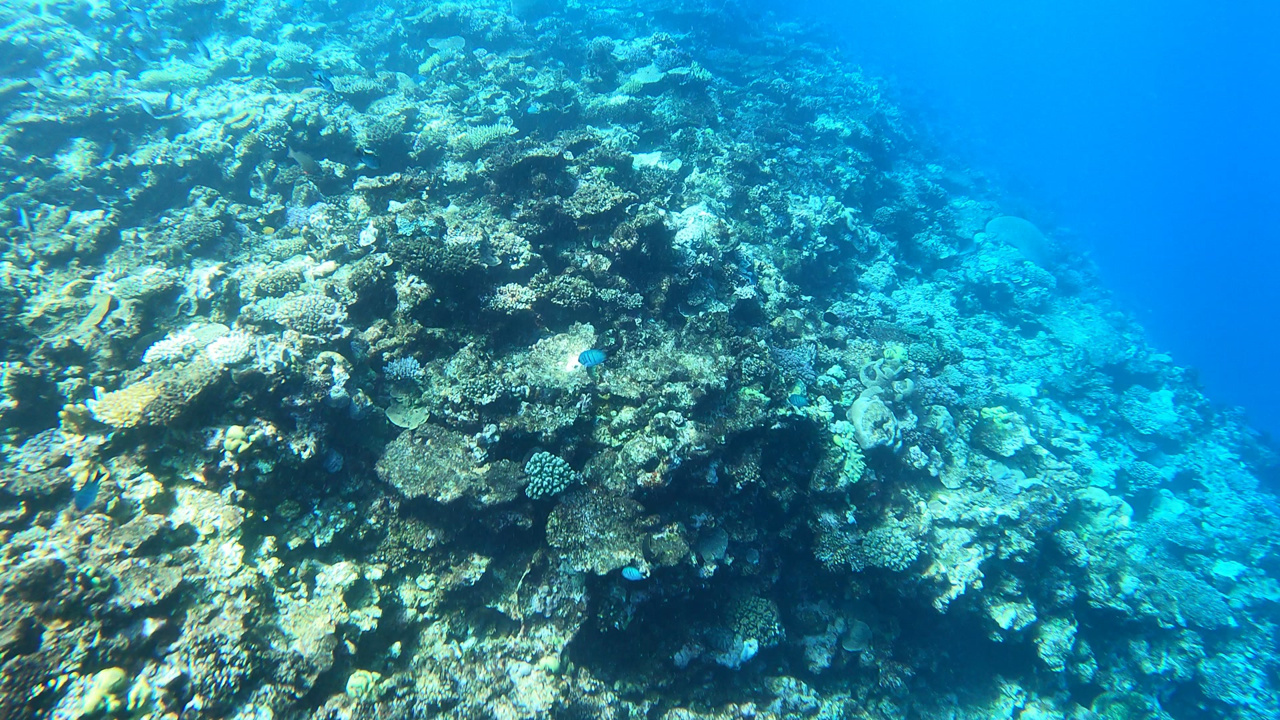

In [8]:
from PIL import Image
image = Image.open(df_train["image_path"][0])
image

# 2 - Details of the training Data
-Frames per video
<br>
-Sequences per video
<br>
-Frames per sequence
<br>
-Annotations

In [9]:
info_videos = df_train.groupby("video_id").agg({"sequence": pd.Series.nunique, "video_frame": "count"})
info_videos = info_videos.rename(columns={"sequence": "total_sequences"})
info_videos = info_videos.rename(columns={"video_frame": "total_video_frames"})
print("Number of sequences and frames in each video: \n")
info_videos

Number of sequences and frames in each video: 



,total_sequences,total_video_frames
video_id,,
0,8,6708
1,8,8232
2,4,8561


In [10]:
total_frames = info_videos.sum()["total_video_frames"]
total_sequences = info_videos.sum()["total_sequences"]
print("Total number of frames (number of images) = ", total_frames)
print("Total number of sequences = ", total_sequences)

Total number of frames (number of images) =  23501
Total number of sequences =  20


In [11]:
# ratio of the total frames in each video
info_videos["ratio_video_frame"] = (info_videos["total_video_frames"]/total_frames)
print("Ratio of the total frames in each video")
info_videos = info_videos.reset_index()
info_videos

Ratio of the total frames in each video


,video_id,total_sequences,total_video_frames,ratio_video_frame
0,0,8,6708,0.285435
1,1,8,8232,0.350283
2,2,4,8561,0.364282


In [12]:
info_sequences = (df_train.groupby(["video_id", "sequence"]).count()["sequence_frame"]).to_frame()
print("Number of frames in each sequence: \n")
info_sequences = info_sequences.rename(columns={"sequence_frame": "total_sequence_frames"})
info_sequences

Number of frames in each sequence: 



total_sequence_frames
video_id sequence                       
0        996                         923
         8399                       1423
         35305                       853
         40258                       480
         45015                       617
         45518                       798
         53708                      1077
         59337                       537
1        8503                       2843
         15827                       770
         17665                        87
         18048                        71
         29424                       184
         44160                       151
         60510                      1167
         60754                      2959
2        22643                      1248
         26651                      1525
         29859                      2988
         37114                      2800

In [13]:
# ratio of the total frames in each sequence
info_sequences["ratio_sequence_frame"] = (info_sequences["total_sequence_frames"]/total_frames)
print("Ratio of the total frames in each sequence")
info_sequences

Ratio of the total frames in each sequence


total_sequence_frames  ratio_sequence_frame
video_id sequence                                             
0        996                         923              0.039275
         8399                       1423              0.060551
         35305                       853              0.036296
         40258                       480              0.020425
         45015                       617              0.026254
         45518                       798              0.033956
         53708                      1077              0.045828
         59337                       537              0.022850
1        8503                       2843              0.120974
         15827                       770              0.032765
         17665                        87              0.003702
         18048                        71              0.003021
         29424                       184              0.007829
         44160                       151              0.006425
         60510                      1167              0.049657
         60754                      2959              0.125910
2        22643                      1248              0.053104
         26651                      1525              0.064891
         29859                      2988              0.127144
         37114                      2800              0.119144

In [14]:
#number of annotations
total_bounding_boxes = sum(df_train["num_bboxes"])
total_frames_with_bbox = len(df_train[df_train["num_bboxes"] > 0]["video_frame"])
print("Total number of bounding boxes = ", total_bounding_boxes)
print("Total number of frames with at least a bounding box = ", total_frames_with_bbox)

Total number of bounding boxes =  11898
Total number of frames with at least a bounding box =  4919


In [15]:
info_videos["num_bboxes"] = df_train.groupby("video_id").agg(pd.Series.sum)["num_bboxes"]
info_videos["ratio_video_bboxes"] = info_videos["num_bboxes"] / total_bounding_boxes
info_videos["frames_with_bbox"] = df_train[df_train["num_bboxes"] > 0].groupby("video_id").agg(pd.Series.count)["video_frame"]
info_videos["ratio_video_frames_with_bboxes"] = info_videos["frames_with_bbox"] / total_frames_with_bbox
info_videos

,video_id,total_sequences,total_video_frames,ratio_video_frame,num_bboxes,ratio_video_bboxes,frames_with_bbox,ratio_video_frames_with_bboxes
0,0,8,6708,0.285435,3065,0.257606,2143,0.435658
1,1,8,8232,0.350283,6384,0.536561,2099,0.426713
2,2,4,8561,0.364282,2449,0.205833,677,0.137630


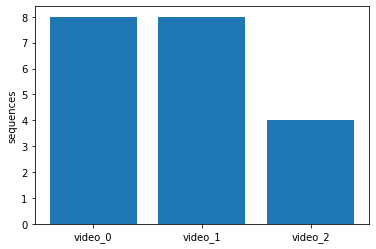

In [16]:
plt.bar("video_"+info_videos["video_id"].astype(str), info_videos["total_sequences"])
plt.ylabel("sequences")
plt.show()

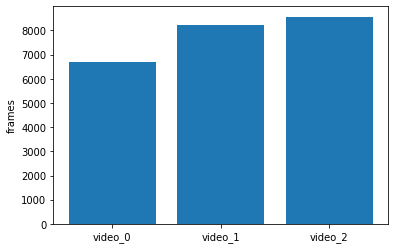

In [17]:
plt.bar("video_"+info_videos["video_id"].astype(str), info_videos["total_video_frames"])
plt.ylabel("frames")
plt.show()

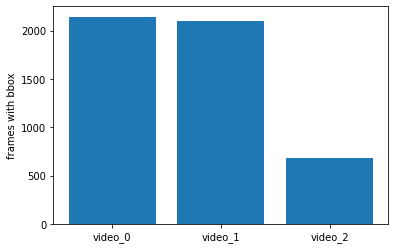

In [18]:
plt.bar("video_"+info_videos["video_id"].astype(str), info_videos["frames_with_bbox"])
plt.ylabel("frames with bbox")
plt.show()

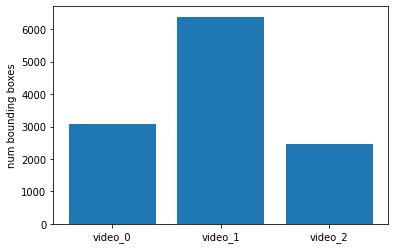

In [19]:
plt.bar("video_"+info_videos["video_id"].astype(str), info_videos["num_bboxes"])
plt.ylabel("num bounding boxes")
plt.show()

In [20]:
info_sequences["num_bboxes"] = df_train.groupby(["video_id", "sequence"]).agg(pd.Series.sum)["num_bboxes"]
info_sequences["ratio_sequence_bboxes"] = info_sequences["num_bboxes"] / total_bounding_boxes
info_sequences["frames_with_bbox"] = df_train[df_train["num_bboxes"] > 0].groupby(["video_id", "sequence"]).agg(pd.Series.count)["video_frame"]
info_sequences["frames_with_bbox"] = info_sequences["frames_with_bbox"].fillna(0).astype(int)
info_sequences["ratio_sequence_frames_with_bboxes"] = info_sequences["frames_with_bbox"] / total_frames_with_bbox
info_sequences = info_sequences.reset_index()
info_sequences

,video_id,sequence,total_sequence_frames,ratio_sequence_frame,num_bboxes,ratio_sequence_bboxes,frames_with_bbox,ratio_sequence_frames_with_bboxes
0,0,996,923,0.039275,279,0.023449,209,0.042488
1,0,8399,1423,0.060551,896,0.075307,564,0.114657
2,0,35305,853,0.036296,89,0.007480,80,0.016263
3,0,40258,480,0.020425,315,0.026475,285,0.057939
4,0,45015,617,0.026254,24,0.002017,22,0.004472
5,0,45518,798,0.033956,123,0.010338,123,0.025005
6,0,53708,1077,0.045828,1146,0.096319,704,0.143119
7,0,59337,537,0.022850,193,0.016221,156,0.031714
8,1,8503,2843,0.120974,3195,0.268533,1100,0.223623
9,1,15827,770,0.032765,74,0.006220,74,0.015044


In [21]:
#info_sequences.loc[[info_sequences["num_bboxes"].idxmax()]]

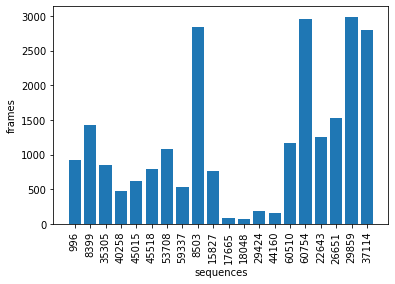

In [22]:
plt.bar(info_sequences["sequence"].astype(str), info_sequences["total_sequence_frames"])
plt.ylabel("frames")
plt.xlabel("sequences")
plt.xticks(rotation=90)
plt.show()

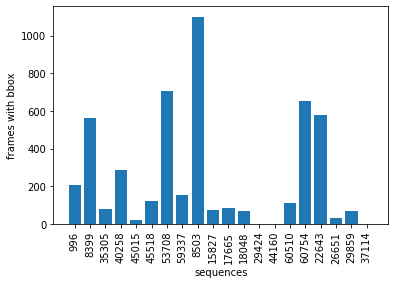

In [23]:
plt.bar(info_sequences["sequence"].astype(str), info_sequences["frames_with_bbox"])
plt.ylabel("frames with bbox")
plt.xlabel("sequences")
plt.xticks(rotation=90)
plt.show()

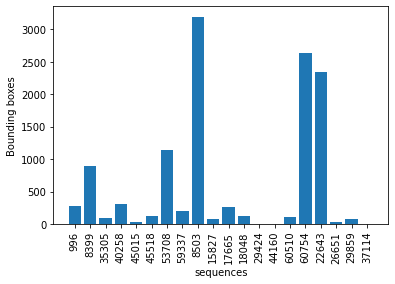

In [24]:
plt.bar(info_sequences["sequence"].astype(str), info_sequences["num_bboxes"])
plt.ylabel("Bounding boxes")
plt.xlabel("sequences")
plt.xticks(rotation=90)
plt.show()

# 3.Train - Eval split
I choose to split train and evaluation sets the following way:
- A single sequence can't be split between training and evaluation set, as images are similar and would leak information
- Keeping around 75% to 85% of the total images with at least a bounding box in the training set
- Keeping around 75% to 85% of the total number of images in the training set

Looking at info_videos and info_sequences dataframes, I've chosen to keep all images from video 0 and video 1 and images from the sequence 37114 of the video 2 in the training set. That way, the training set has around 86% of the images with bounding boxes and around 75% of the total number of images. It will have around 79% of the total number of bounding boxes as well.

In [25]:
# placeholder, finish in future versions to obtain random splits
from sklearn.model_selection import train_test_split

def split_sequences(sequences_info_df, train_ratio):
    sequence_list = sequences_info_df["sequence"].values
    train, test = train_test_split(sequence_list, test_size = train_ratio)
    return (train, test)

In [26]:
sequences_train_split = info_sequences[(info_sequences["video_id"] == 0) | (info_sequences["video_id"] == 1) | (info_sequences["sequence"] == 37114)]
sequences_train_split

,video_id,sequence,total_sequence_frames,ratio_sequence_frame,num_bboxes,ratio_sequence_bboxes,frames_with_bbox,ratio_sequence_frames_with_bboxes
0,0,996,923,0.039275,279,0.023449,209,0.042488
1,0,8399,1423,0.060551,896,0.075307,564,0.114657
2,0,35305,853,0.036296,89,0.007480,80,0.016263
3,0,40258,480,0.020425,315,0.026475,285,0.057939
4,0,45015,617,0.026254,24,0.002017,22,0.004472
5,0,45518,798,0.033956,123,0.010338,123,0.025005
6,0,53708,1077,0.045828,1146,0.096319,704,0.143119
7,0,59337,537,0.022850,193,0.016221,156,0.031714
8,1,8503,2843,0.120974,3195,0.268533,1100,0.223623
9,1,15827,770,0.032765,74,0.006220,74,0.015044


In [27]:
print("Training set split:")
print("percentage of images with bounding boxes: ", sum(sequences_train_split["ratio_sequence_frames_with_bboxes"])*100, "%")
print("percentage of total images: ", sum(sequences_train_split["ratio_sequence_frame"])*100, "%")
print("percentage of bounding boxes: ", sum(sequences_train_split["ratio_sequence_bboxes"])*100, "%")
total_split_train_images = sum(sequences_train_split["total_sequence_frames"])
total_split_eval_images = len(df_train) - total_split_train_images
print("Total images in training split: ", total_split_train_images)
print("Total images in evaluation split: ", total_split_eval_images)

Training set split:
percentage of images with bounding boxes:  86.2370400487904 %
percentage of total images:  75.48614952555211 %
percentage of bounding boxes:  79.41670869053623 %
Total images in training split:  17740
Total images in evaluation split:  5761


In [28]:
df_train_split = df_train[df_train["sequence"].isin(sequences_train_split["sequence"])]
df_train_split

,video_id,sequence,video_frame,sequence_frame,image_id,annotations,image_path,num_bboxes
0,0,40258,0,0,0-0,[],/kaggle/input/tensorflow-great-barrier-reef/tr...,0
1,0,40258,1,1,0-1,[],/kaggle/input/tensorflow-great-barrier-reef/tr...,0
2,0,40258,2,2,0-2,[],/kaggle/input/tensorflow-great-barrier-reef/tr...,0
3,0,40258,3,3,0-3,[],/kaggle/input/tensorflow-great-barrier-reef/tr...,0
4,0,40258,4,4,0-4,[],/kaggle/input/tensorflow-great-barrier-reef/tr...,0
...,...,...,...,...,...,...,...,...
17735,2,37114,2795,2795,2-2795,[],/kaggle/input/tensorflow-great-barrier-reef/tr...,0
17736,2,37114,2796,2796,2-2796,[],/kaggle/input/tensorflow-great-barrier-reef/tr...,0
17737,2,37114,2797,2797,2-2797,[],/kaggle/input/tensorflow-great-barrier-reef/tr...,0
17738,2,37114,2798,2798,2-2798,[],/kaggle/input/tensorflow-great-barrier-reef/tr...,0


In [29]:
df_eval_split = df_train[~df_train["sequence"].isin(sequences_train_split["sequence"])]
df_eval_split

,video_id,sequence,video_frame,sequence_frame,image_id,annotations,image_path,num_bboxes
17740,2,26651,3672,0,2-3672,[],/kaggle/input/tensorflow-great-barrier-reef/tr...,0
17741,2,26651,3673,1,2-3673,[],/kaggle/input/tensorflow-great-barrier-reef/tr...,0
17742,2,26651,3674,2,2-3674,[],/kaggle/input/tensorflow-great-barrier-reef/tr...,0
17743,2,26651,3675,3,2-3675,[],/kaggle/input/tensorflow-great-barrier-reef/tr...,0
17744,2,26651,3676,4,2-3676,[],/kaggle/input/tensorflow-great-barrier-reef/tr...,0
...,...,...,...,...,...,...,...,...
23496,2,29859,10755,2983,2-10755,[],/kaggle/input/tensorflow-great-barrier-reef/tr...,0
23497,2,29859,10756,2984,2-10756,[],/kaggle/input/tensorflow-great-barrier-reef/tr...,0
23498,2,29859,10757,2985,2-10757,[],/kaggle/input/tensorflow-great-barrier-reef/tr...,0
23499,2,29859,10758,2986,2-10758,[],/kaggle/input/tensorflow-great-barrier-reef/tr...,0


# 4.Install Tensorflow Object Detection API
This section follows the installation guide provided in the tensorflow object detection api github: https://github.com/tensorflow/models/blob/master/research/object_detection/g3doc/tf2.md

In [30]:
# clone tensorflow/models repository
!git clone https://github.com/tensorflow/models

Cloning into 'models'...
remote: Enumerating objects: 68896, done.
remote: Counting objects: 100% (11/11), done.
remote: Compressing objects: 100% (11/11), done.
remote: Total 68896 (delta 4), reused 5 (delta 0), pack-reused 68885
Receiving objects: 100% (68896/68896), 577.13 MiB | 32.29 MiB/s, done.
Resolving deltas: 100% (48537/48537), done.


In [31]:
#checkout a commit to ommit changes after this notebook
!cd models && git checkout f08513d

Note: switching to 'f08513d'.

You are in 'detached HEAD' state. You can look around, make experimental
changes and commit them, and you can discard any commits you make in this
state without impacting any branches by switching back to a branch.

If you want to create a new branch to retain commits you create, you may
do so (now or later) by using -c with the switch command. Example:

  git switch -c <new-branch-name>

Or undo this operation with:

  git switch -

Turn off this advice by setting config variable advice.detachedHead to false

HEAD is now at f08513d40 Internal change


In [32]:
# Go into models/research and check
HOME_DIRECTORY = os.getcwd()
%cd models/research
!dir

/kaggle/working/models/research
README.md	    cvt_text	   lstm_object_detection  seq_flow_lite
adversarial_text    deep_speech    marco		  slim
attention_ocr	    deeplab	   nst_blogpost		  vid2depth
audioset	    delf	   object_detection
autoaugment	    efficient-hrl  pcl_rl
cognitive_planning  lfads	   rebar


In [33]:
# Compile protos
!protoc object_detection/protos/*.proto --python_out=.

In [34]:
# Install TensorFlow Object Detection API.
!cp object_detection/packages/tf2/setup.py .
!python -m pip install --use-feature=2020-resolver .

Processing /kaggle/working/models/research
  Preparing metadata (setup.py) ... - \ done
     |████████████████████████████████| 352 kB 693 kB/s            
     |████████████████████████████████| 106 kB 12.9 MB/s            
  Installing build dependencies ... - \ | / - \ | / done
  Getting requirements to build wheel ... - done
  Preparing metadata (pyproject.toml) ... - done
     |████████████████████████████████| 2.2 MB 11.5 MB/s            
     |████████████████████████████████| 4.9 MB 62.3 MB/s            
     |████████████████████████████████| 61 kB 5.5 MB/s             
     |████████████████████████████████| 99 kB 6.9 MB/s             
  Preparing metadata (setup.py) ... - done
     |████████████████████████████████| 90 kB 6.5 MB/s             
     |████████████████████████████████| 213 kB 39.0 MB/s            
     |████████████████████████████████| 636 kB 38.8 MB/s            
     |████████████████████████████████| 43 kB 1.3 MB/s             
  P

In [35]:
# Go back to home directory /kaggle/working
%cd {HOME_DIRECTORY}
!dir

/kaggle/working
__notebook__.ipynb  models


# 5.Create TF records
This section follows the official guide "Bringing in your own dataset" from TF object detection github: https://github.com/tensorflow/models/blob/master/research/object_detection/g3doc/using_your_own_dataset.md